# <Center>Predicting Customer Response to Bank Direct Telemarketing Campagin of A Portuguese Banking Institution<Center>

## Table of Contents
1. **[Project Description](#1)**
2. **[Data Cleaning](#2)**
3. **[Exploratory Data Analysis (EDA)](#3)**
4. **[Data Visualization](#4)**
5. **[Methodology - Overall Pipeline](#5)**
6. **[Resampling](#6)**
7. **[Machine Learning Part 1(Single Classifier)](#7)**
8. **[Machine Learning Part 2(Ensemble Classifier)](#8)**
9. **[Discussion & Conclusion](#9)**
10. **[Future Research](#10)**

* Add Feature Engineering Part!

## 1. Project Description <a class="anchor" id="1"></a>

**Motivation:** Nowdays, companies use various channels to target specific segements of customers. One of ways to sell their campaign is through a direct marketing to communicate with their customers. The effective and clear target segement strategy would attract more customers to subscribe for a new service and improve customer satisfactions. Therefore, the company needs to analyze the customers on a more granular level such as demographics and finanical background in order to find specific patterns 

In this specific scenario, UCI Machine Learning Repository provides a dataset that cotains clients data from a Portuguese retail bank. The data is collected from 2008 to 2013, which also includes the aftermath of the finanical crisis, so these external factors will be also considered in this project as well
([Moro et al., 2014](https://www.sciencedirect.com/science/article/pii/S016792361400061X#:~:text=We%20propose%20a%20data%20mining,selling%20bank%20long%2Dterm%20deposits.&text=Such%20knowledge%20extraction%20confirmed%20the,valuable%20for%20telemarketing%20campaign%20managers)).

**Goal of the project:** Enhance the marketing effectiveness of the Bank Direct Telemarketing Campaign in a specific case of a Portuguese Banking Instiution

**Dataset Description** Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22-31**<br>
The dataset can be downloaded from here (https://archive.ics.uci.edu/ml/datasets/bank+marketing#)

**Bank client data:**<br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

**Related with the last contact of the current campaign:** <br>
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). <br>

**Other attributes:** <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

**Social and economic context attributes:** <br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

**Output variable:** <br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>



### Load relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import math
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 41188
Number of columns: 21


## 2. Data Cleaning <a class="anchor" id="2"></a>

### 2.1 Handling Missing data
- According to the data provider, some of categorical features contain missing values, but these values are not saved as NaN or Null. Instead these missing values are recorded as "unknown" label. Therefore, the provider suggested to treat these missing values as "a possible class label or using deletion or imputation techniques"

In [4]:
# Step 1: Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Step 2: Check any missing vaslues
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# Step 3: Check "unknown label" proporition to total length dataset
((df.iloc[:,1:7] == 'unknown').sum() / len(df) * 100).sort_values(ascending=False)

default      20.872584
education     4.202680
loan          2.403613
housing       2.403613
job           0.801204
marital       0.194231
dtype: float64

- Rule of thumb of missing values proportion is between 25%-30%. So these unknown values will be reaplced with most frequent values

In [7]:
# Step 4 Using for loop to replace with mode
for col in df.iloc[:,1:7].columns:
    for i, value in enumerate(df[col].values):
        if df[col][i] == 'unknown':
            df[col][i] = df[col][i].replace(df[col][i], df[col].mode()[0])

### 2.2 Transforming data

In [8]:
# Step 1: Drop unncessary columns
df.drop('contact', axis=1, inplace=True)

In [9]:
# Step 2: Change duration from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [10]:
# Step 3: Change month into numeric
months_to_replace = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month'] = df['month'].map(months_to_replace)

In [11]:
# Step 4: Change target variable name and convert to numeric
df.rename(index=str, columns={'y': 'response'}, inplace=True)
mapping_dict = {'yes': 1, 'no': 0}
df['response'] = df['response'].apply(lambda x:mapping_dict[x])
df['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

### 2.3 Filtering

In [12]:
# Delete people who spent less than 10s (duration feature)
duration_10_ = df['duration'] > 10/60
df.drop(df[~duration_10_].index, inplace=True)

## 3. Exploratory Data Analysis (EDA) <a class="anchor" id="3"></a>

### 3.1 Numerical Variables

### The distibution of Age

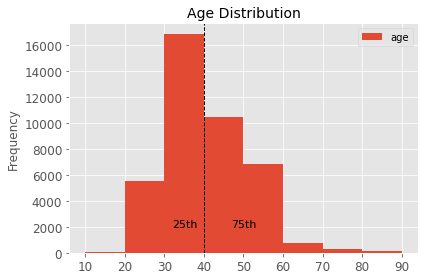

In [13]:
age = df['age'].sort_values(ascending=False).reset_index()
age.drop('index', axis=1, inplace=True)
age_mean_ = int(age.mean())
age_25per_ = np.percentile(age, 25)
age_75per_ = np.percentile(age, 75)

age.plot.hist(by=age['age'], bins=range(10, 100, 10))
plt.axvline(age_mean_,color='black', linestyle='dashed', linewidth=1)
plt.text(age_25per_, 2000,'25th', size = 11)
plt.text(age_75per_, 2000,'75th', size = 11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.tight_layout()
plt.show()

**The distribution of Age** shows that the age group that was contacted is fairly have a normal distribution. The banks contacted a wide range of age group which contains between 10s and 90. Specifically the age group beteween 30s (75th percentile) and 40s (75th percentile) were mostly contacted by the bank and the average age is 40. 

### The distribution of Duration

Text(0.5, 1.0, 'Boxplot of Duration')

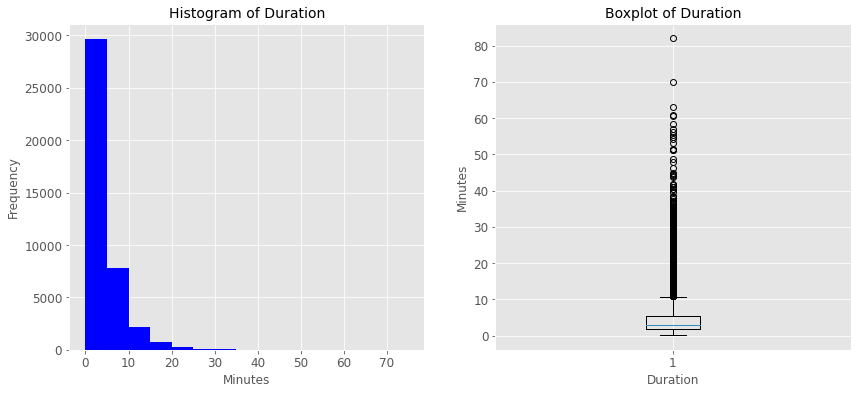

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=range(0, 80, 5), color='blue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Duration', fontsize=14)

plt.subplot(1, 2, 2)
plt.boxplot(df['duration'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Minutes', fontsize= 12)
plt.xlabel('Duration', fontsize= 12)
plt.title('Boxplot of Duration', fontsize=14)

**The distribution of duration** displays that it is skewed to right (positive skew) which indicates most of calls were less than 10 minutes. According to the boxplot, however, shows that there is a large number of outliers between 10 ad 40 minutes. Therefore, a further study should be conduted later.

### The distribution of Campaign

Text(0.5, 1.0, 'Boxplot of Campaign')

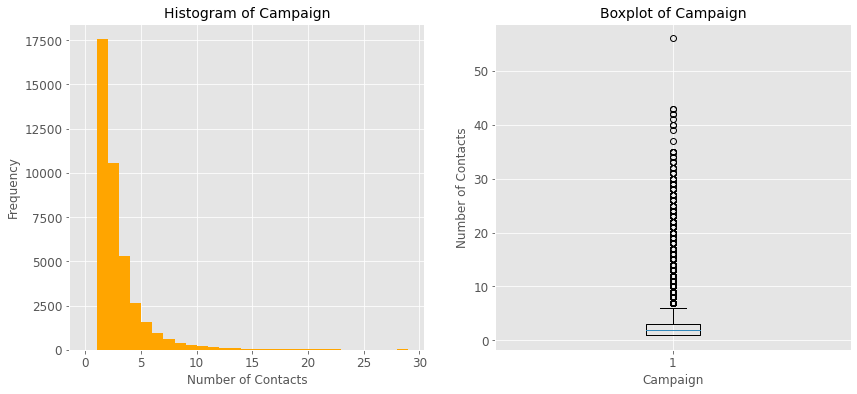

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.hist(df['campaign'], bins=range(0, 30), color='orange')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of Contacts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Campaign', fontsize=14)

plt.subplot(1, 2, 2)
plt.boxplot(df['campaign'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of Contacts', fontsize=12)
plt.xlabel('Campaign', fontsize= 12)
plt.title('Boxplot of Campaign', fontsize=14)

**The distribution of campaign** exhibits that 1 contact was made on average. Majority of contacts were made between 1 and 3 for a new campaign. However, some of contacts were reached by the banks over 10 times and one contact was reached over 58 times. Therefore, these outliers will be further investigated later to find out the pattern.

- Find conversation rate

### The relationship between duration and campaign with response results

Text(0.5, 1.0, 'Duration VS Campaign with response')

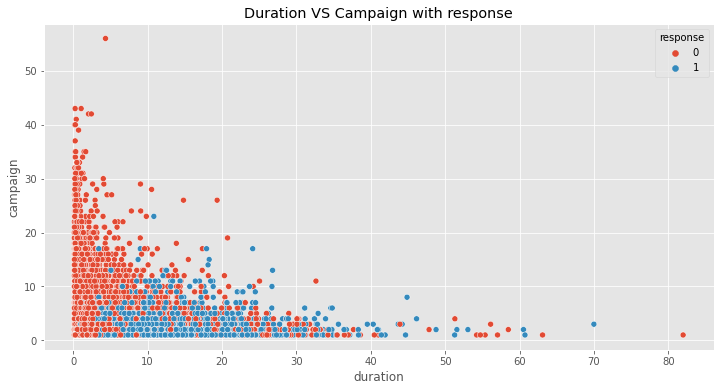

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot('duration', 'campaign', hue='response', data=df).set_title('Duration VS Campaign with response')

It shows that many people signed up for a new service when they were contacted **less than 10 times**. These **people spent between 5 to 30 mintues** on the phone with the bank. This makes sense since the bank has to explain about the new product, potential benefit, and risk. Another observation is that people who got contacted over 10 times didn't sign up. The possible explaination could be that these people might got annoyed by the frequent contact by the ban, so they also spent less than 5 mintues on the phone. 

### 3.2 Categorical Variables

### Personal background

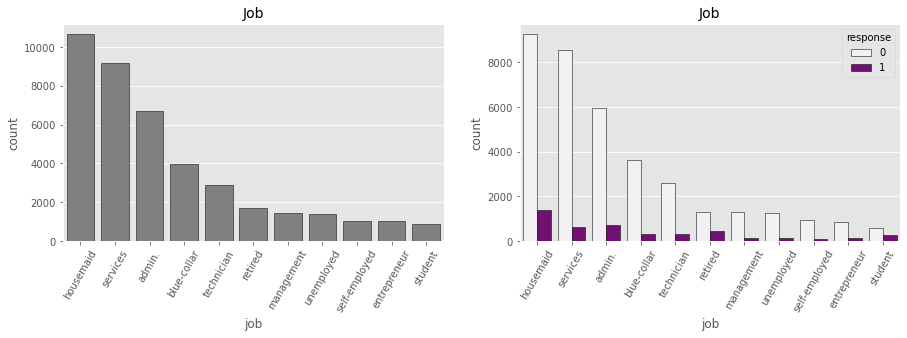

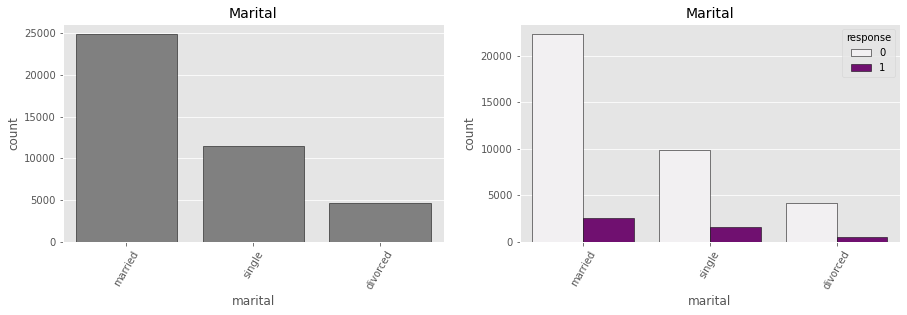

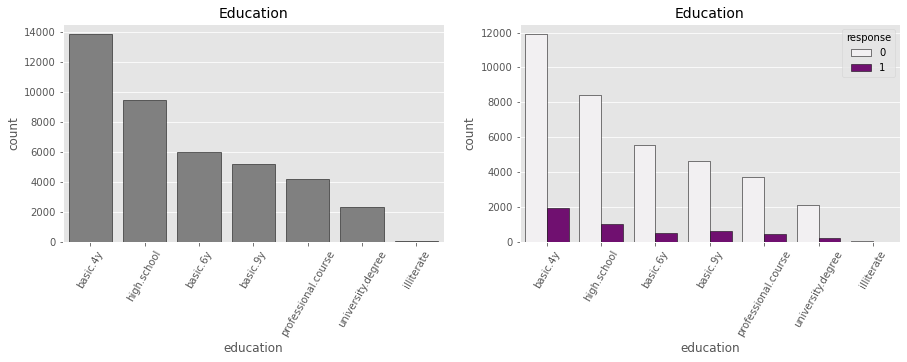

In [17]:
cat_var1 = df[['job', 'marital', 'education']]

for col in cat_var1:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=col, ax=axs[0], order=df[col].value_counts().index, edgecolor='black', color='grey')
    axs[0].set_title(col.title(), fontsize=14)
    axs[0].set_xticklabels(labels=df[col].unique(), rotation=60)
    
    sns.countplot(data=df, x=col, hue='response', ax=axs[1], order=df[col].value_counts().index, edgecolor='black', color='purple') ## How to order by "response"?
    axs[1].set_title(col.title(), fontsize=14)
    axs[1].set_xticklabels(labels=df[col].unique(), rotation=60)

**Job**: Majority of clients have housemaid, services, admin, and blue-collar jobs. Given these people, housemaid, admin, services tend to have a high subscription. One interesting obeservation here is that retired and student proprotionally have a high subscription. This result suggests that the bank should consider retired and student. <br>
**Marital**: Type of maritial does not necessarily have an influence its response. <br>
**Education**: General information about Portugese Education System:
- Basic 4y: Age 6-9
- Basic 6y: Age 10-11
- Basic 9y: Age 12-14
- High school (secondary education): Age 15-17
- Univerity: Age >17
- Professional Course: Online & Offline courses that are usually provided by university or companies

Numerous clients had basic.4y educational background, which seems odd that these people did not fully complete their basic education. Nevertheless, these people actually had the highest subscription compared to other educational group. Moreover, people with basic 6y and basic 9y also have a similar subscription amount as professional course. Surprisingly, people with university degreee tend to sign up less than people with high school degree or basic education. Thie implies that people with lower education background is likely to subscribe. 

### Financial Background

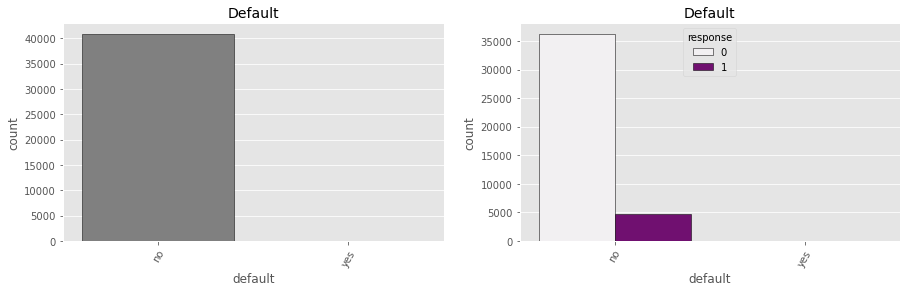

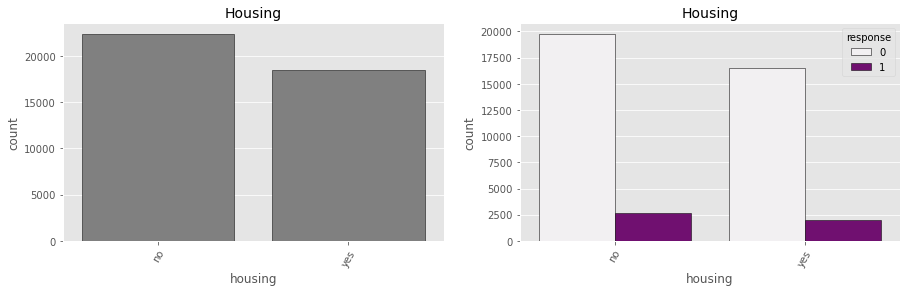

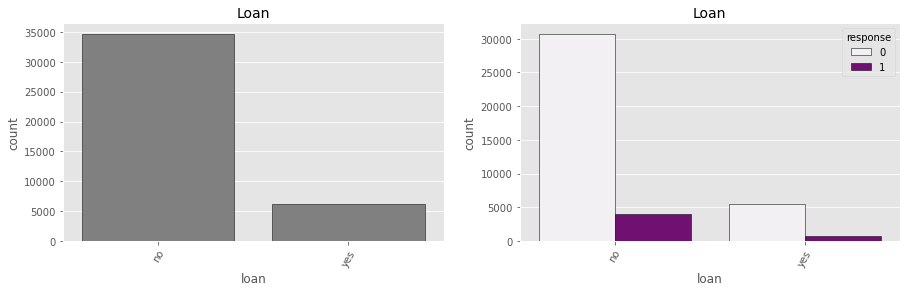

In [18]:
cat_var2 = df[['default', 'housing', 'loan']]

for col in cat_var2:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=col, ax=axs[0], order=df[col].value_counts().index, edgecolor='black', color='grey')
    axs[0].set_title(col.title(), fontsize=14)
    axs[0].set_xticklabels(labels=df[col].unique(), rotation=60)
    
    sns.countplot(data=df, x=col, hue='response', ax=axs[1], order=df[col].value_counts().index, edgecolor='black', color='purple')
    axs[1].set_title(col.title(), fontsize=14)
    axs[1].set_xticklabels(labels=df[col].unique(), rotation=60)

**Default**: Default people didn't subscribe the new product, because these people would not be obiosuly eligible for the new proudct. <br>
**Housing**: Having a housing loan did not limit them to subscribe. The possible explaination is that the duration of mortgage is over 10 year, so they wouldn't be hesistant with the new subscription. <br>
**Loan**: Unlike a housing loan, personal loan has a short duration, so more people without personal loan subscribed. When people have a smaller disposable income due to loans, then they would rather focus on payingback loan on time, instead of signing up for the new product.

### 3.3 Relationship

### The scatter plot

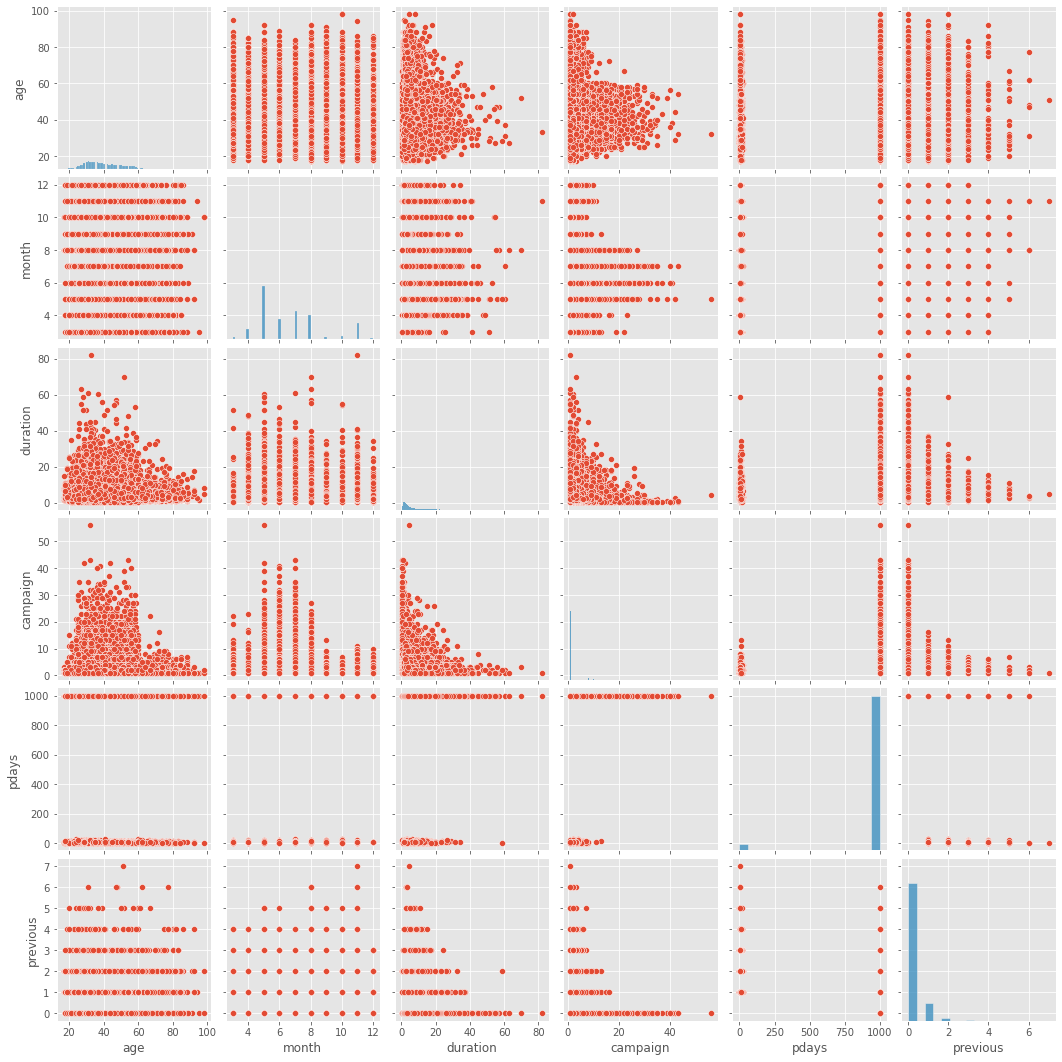

In [19]:
sns.pairplot(df.iloc[:, 0:14])
plt.show()

### The correlation matrix

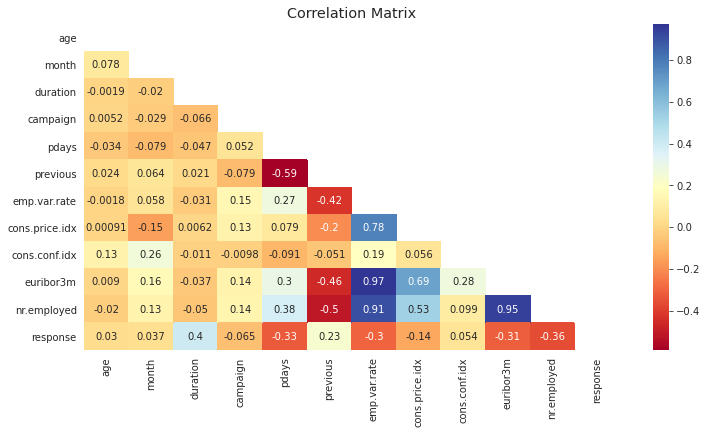

In [20]:
corr = df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 6))
    ax = sns.heatmap(corr, annot=True, mask=mask, cmap='RdYlBu').set_title('Correlation Matrix')

- High positive correlation: Social and economic context attibutes have a high correlation, because changes in interest rate or inflation influence nubmer of employment. However these attributes do not have a strong correlation with clients. 
- Moderate correlation: Previous and pdays have a moderate correlation, so we don't necessarily need pdays, because these variables explain similar sttufs anyway. Moreover, the infleunce of duration potentially case response.

Age, month, duration, and campaign don't seem to have any relationship

## 4. Data Visualization <a class="anchor" id=""></a>

### Time Period

#### Which month and year did bank contact the most? and how does response vary over time?

In [21]:
# Multiple years are included in this single dataset. It is divided by based on consumer confidence index
def year_categorize(year):
    if (year == -36.4 or year == -41.8 or year == -42.7 or year == -36.1 or year == -40.4 or year == -42 or year == -45.9) :
        return 2008
    elif (year == -50 or year == -47.1 or year == -46.2 or year == -40.8 or year == -33.6 or year == -31.4 or year == -29.8 or year == -26.9 or year == -30.1 or year == -33):
        return 2009
    else:
        return 2010

df['year'] = df['cons.conf.idx'].apply(year_categorize)
df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

Text(0.5, 1.0, 'Number of Contacts (Campaigns) in the 2008-2010')

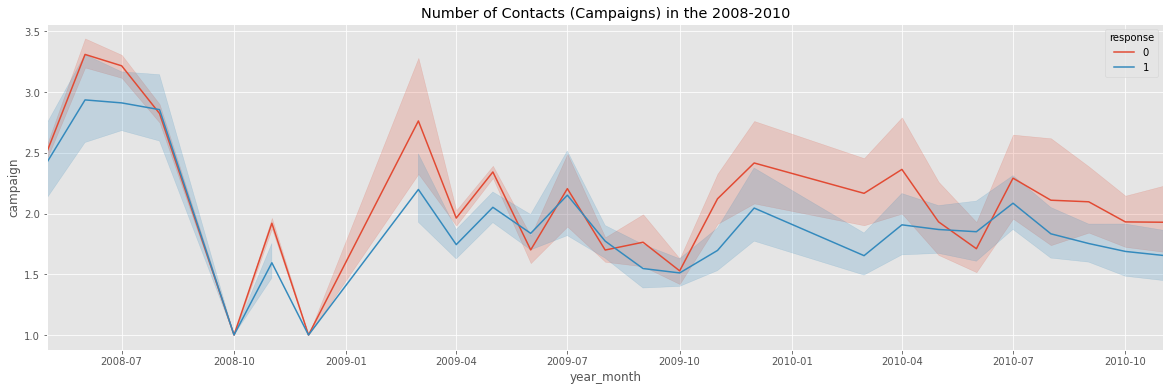

In [27]:
plt.figure(figsize=(20,6))
year_month_ = sns.lineplot(x='year_month', y='campaign', hue='response', data=df)
year_month_.set_xlim([datetime.date(2008, 5, 1), datetime.date(2010, 11, 1)])
year_month_.set_title('Number of Contacts (Campaigns) in the 2008-2010')

Text(0.5, 1.0, 'Yearly Countplot')

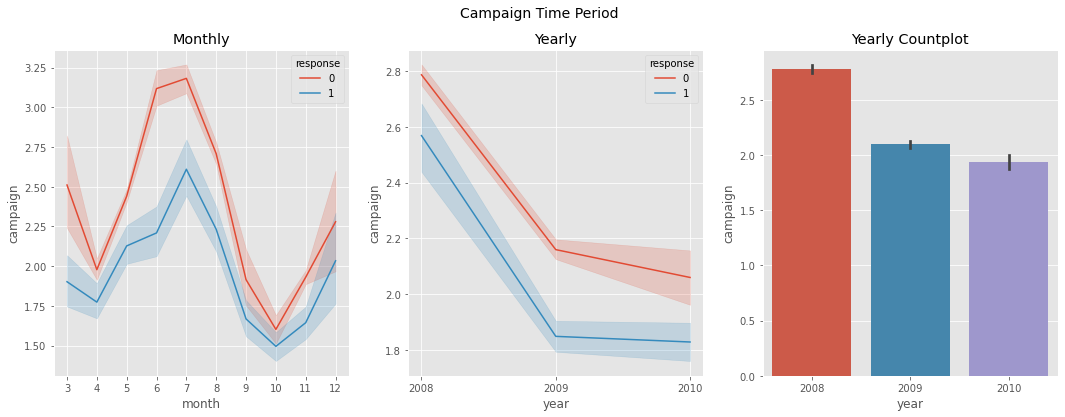

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Campaign Time Period', fontsize=14)

monthly = sns.lineplot(ax=axes[0], x='month', y='campaign', hue='response', data=df)
yearly = sns.lineplot(ax=axes[1], x='year', y='campaign', hue='response', data=df)
yearly_count = sns.barplot(ax=axes[2], x='year', y='campaign', data=df)

monthly.set(xticks=np.arange(3, 13, 1))
monthly.set_title('Monthly')

yearly.set(xticks=np.arange(2008, 2011))
yearly.set_title('Yearly')

yearly_count.set_title('Yearly Countplot')

**Monthly**: No contact was made during January and February. July was the highest month, while october was the lowest month that were contacted by the bank. The trend for both responses are very similar. <br>
**Yearly**: 2008 was the highest year due to more data collection. The downward trend is visble in 2010 especially for non-subscribers, but the similar number of people subscribed during 2009 and 2010. <br>

### Subscription rate over year

In [28]:
sub_2008 = ((df['response'] == 1) & (df['year'] == 2008)).sum() / len(df['year'] == 2008) * 100
sub_2009 = ((df['response'] == 1) & (df['year'] == 2009)).sum() / len(df['year'] == 2009) * 100
sub_2010 = ((df['response'] == 1) & (df['year'] == 2010)).sum() / len(df['year'] == 2010) * 100
subscription_rate_year = pd.Series([sub_2008, sub_2009, sub_2010], index=np.arange(2008, 2011))

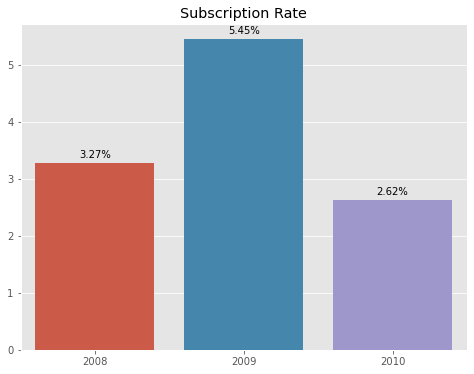

In [40]:
plt.figure(figsize=(8,6))
sub_plot = sns.barplot(x=subscription_rate_year.index, y=subscription_rate_year)
sub_plot.set_title('Subscription Rate')

for p in sub_plot.patches:
 height = p.get_height() 
 sub_plot.text(x = p.get_x()+(p.get_width()/2),
 y = height+0.1, 
 s = '{:.2f}'.format(height) + '%', 
 ha = 'center')

### Define Target Group

#### Subscription Rate - Age

Text(0.5, 1.0, 'Subscription rate within three main age group')

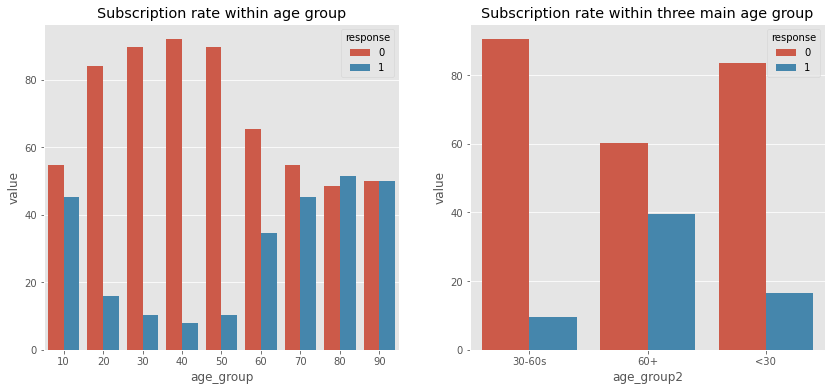

In [30]:
# Categorize age group
def age_categorize(age):
    return math.floor(age / 10) * 10

# Categorize age into three groups
def age_categorize2(age):
    if age < 30:
        return '<30'
    elif age < 60:
        return '30-60s'
    else:
        return '60+'  
    
# Add age group columns
df['age_group'] = df['age'].apply(age_categorize)
df['age_group2'] = df['age'].apply(age_categorize2)
# Calculate subscription rate within age group
age_res_ = pd.crosstab(df['response'], df['age_group']).apply(lambda x:x/x.sum()*100) 
age_res2_ = pd.crosstab(df['response'], df['age_group2']).apply(lambda x:x/x.sum()*100) 
stacked = age_res_.stack().reset_index().rename(columns={0:'value'})
stacked2 = age_res2_.stack().reset_index().rename(columns={0:'value'})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(ax=axes[0], x=stacked.age_group, y=stacked.value, hue=stacked.response).set_title('Subscription rate within age group')
sns.barplot(ax=axes[1], x=stacked2.age_group2, y=stacked2.value, hue=stacked2.response).set_title('Subscription rate within three main age group')

1. Subscription rate for 10s and 60+ have around 40% subscription rate, which suggests that these age group should be our age target.
2. Age group betwen 20s and 50s had the lowest subscription rate compared to the other age group. Financial aspect should be further investigated to find out if exisiting loans limit them for the new product

#### Subscription Rate - Job

Text(0.5, 1.0, 'Subscription rate for different jobs')

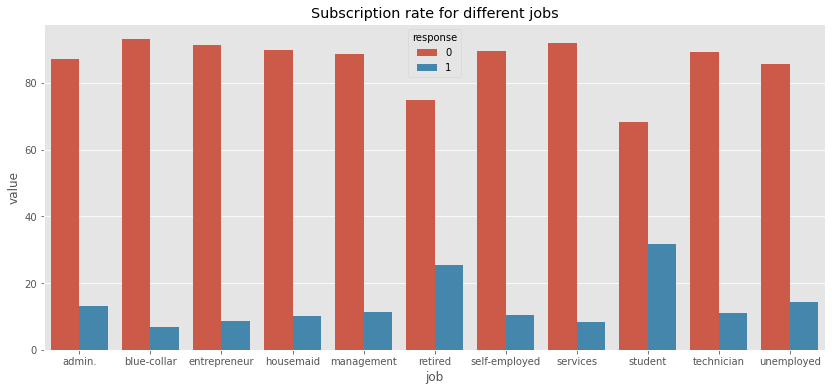

In [37]:
job_res_ = pd.crosstab(df['response'], df['job']).apply(lambda x:x/x.sum()*100)
stacked3 = job_res_.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(14,6))
# plot_order = stacked3[(stacked3['response'] == 1)]['value'].sort_values(ascending=False).index
sns.barplot(x=stacked3.job, y=stacked3.value, hue=stacked3.response).set_title('Subscription rate for different jobs')

**Subscription Rate for Job**: Retired and student have above 20% subscription rate. We previously saw that 10s and 60+ have the highest subscription rate, which is why student and retired people should be our main target group.

#### Subscription Rate - Education

Text(0.5, 1.0, 'Subscription rate for different education')

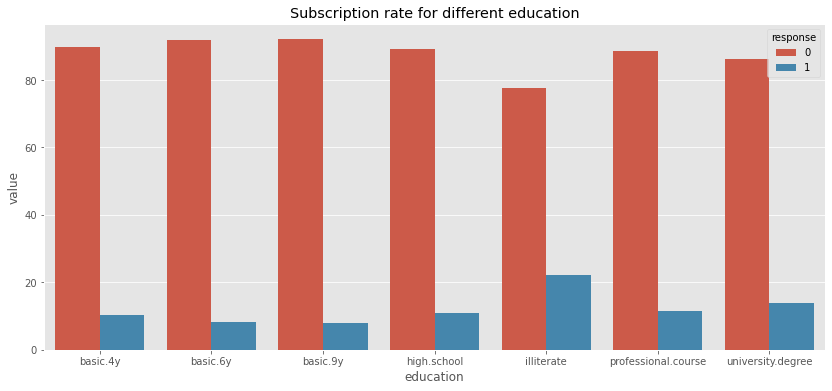

In [36]:
edu_res_ = pd.crosstab(df['response'], df['education']).apply(lambda x:x/x.sum()*100) 
stacked4 = edu_res_.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(14,6))
sns.barplot(x=stacked4.education, y=stacked4.value, hue=stacked4.response).set_title('Subscription rate for different education')

**Subscription Rate for Education**: Subscription rate did not vary based on people's educational background. One interesting observation is that illiterate people have the highest subscription rate. 

#### Subscription Rate - Loan & Housing Loan

Text(0.5, 1.0, 'Subscription rate for people w/ VS w/o Housing Loan')

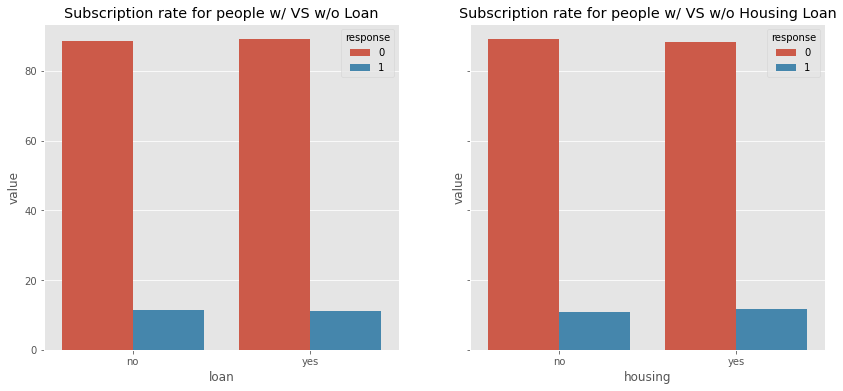

In [51]:
loan_res_ = pd.crosstab(df['response'], df['loan']).apply(lambda x:x/x.sum()*100) 
housing_res_ = pd.crosstab(df['response'], df['housing']).apply(lambda x:x/x.sum()*100) 
stacked5 = loan_res_.stack().reset_index().rename(columns={0:'value'})
stacked6 = housing_res_.stack().reset_index().rename(columns={0:'value'})

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(ax=axes[0], x=stacked5.loan, y=stacked5.value, hue=stacked5.response).set_title('Subscription rate for people w/ VS w/o Loan')
sns.barplot(ax=axes[1], x=stacked6.housing, y=stacked6.value, hue=stacked6.response).set_title('Subscription rate for people w/ VS w/o Housing Loan')

**Subscription Rate for Loan & Housing Loan**: Very similar subscription rate whether people have loan or not. Same logic applies to the housing loan as well.

### Subscription Rate - People with both loan and housing loan VS people without any loans

Text(0.5, 1.0, 'Subscription rate for people without any loans')

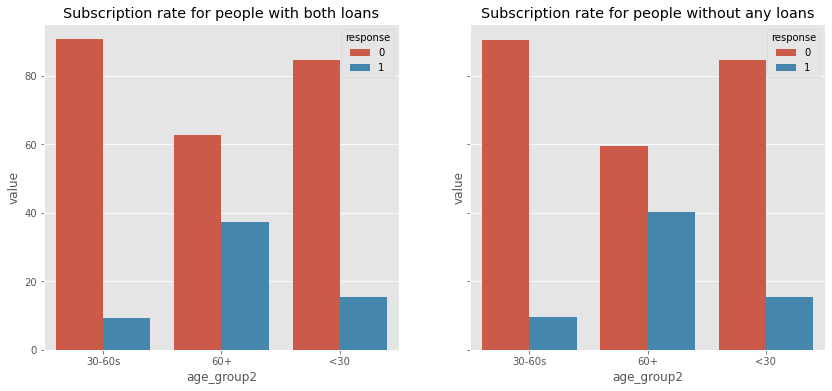

In [95]:
loan_housing_n_ = df[(df['loan'] == 'no') & (df['housing'] == 'no')]
loan_housing_y_ = df[(df['loan'] == 'yes') & (df['housing'] == 'yes')]

loan_res_n_ = pd.crosstab(loan_housing_n_['response'], loan_housing_n_['age_group2']).apply(lambda x:x/x.sum()*100) 
loan_res_y_ = pd.crosstab(loan_housing_y_['response'], loan_housing_y_['age_group2']).apply(lambda x:x/x.sum()*100) 

stacked7 = loan_res_n_.stack().reset_index().rename(columns={0:'value'})
stacked8 = loan_res_y_.stack().reset_index().rename(columns={0:'value'})

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(ax=axes[0], x=stacked7.age_group2, y=stacked7.value, hue=stacked7.response).set_title('Subscription rate for people with both loans')
sns.barplot(ax=axes[1], x=stacked8.age_group2, y=stacked8.value, hue=stacked8.response).set_title('Subscription rate for people without any loans')

**Subscription Rate - People with both loan and housing loan VS people without any loans**: It confirms that subscription rate does not differ much whether they have both loans or not.

## Summary: Target Group
Based on people's personal and financial back ground, our target group is: <br>
- **Student and retired people** should be our main target audience, since they had the highest subscrption rate.
- **60+** should be our main age group, but **10s** should also be included as their subscription rate is similar to older generation.
- **Education and financial background** did not really matter in terms of subscription rate. But people with default status should not be included for future campaign.